# Check to see if you're ready to go on Thursday!
1. Run each block of code
2. Check for errors
3. When you think you're error free, flag down a teaching team member to confirm

In [1]:
####This is what an error looks like
print a

NameError: name 'a' is not defined

# Objectives
### Get comfortable with IPython Notebook

* How to start IPython Notebook
* How to read data into pandas
* How to do simple manipulations on pandas dataframes


## Start a notebook:
For each class, we'll be using a set of common data science libraries and tools, like the IPython notebook. You can start an IPython notebook by running

```
jupyter notebook $NAME_OF_FILE
```


## Try it yourself!
Read and run the block of code below by: 
1. Clicking on it and pressing the play button above or
2. Using a short cut- (help --> keyboard shortcuts)

In [2]:
%matplotlib inline #used to display plots in the notebook, rather than printing it out
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

mpl.rcParams['figure.figsize'] = (15, 6)
pd.set_option('display.width', 4000)
pd.set_option('display.max_columns', 100)

# First: Read in the data
### Review Simple Commands

Practice downloading and reading into sample data

In [3]:
# Download and read the data (this may take more than 1 minute)
orig_data = pd.read_csv('../../assets/dataset/311-service-requests.csv', parse_dates=['Created Date'], low_memory=False)

In [61]:
orig_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111069 entries, 0 to 111068
Data columns (total 52 columns):
Unique Key                        111069 non-null int64
Created Date                      111069 non-null datetime64[ns]
Closed Date                       60270 non-null object
Agency                            111069 non-null object
Agency Name                       111069 non-null object
Complaint Type                    111069 non-null object
Descriptor                        110613 non-null object
Location Type                     79022 non-null object
Incident Zip                      98807 non-null object
Incident Address                  84441 non-null object
Street Name                       84432 non-null object
Cross Street 1                    84728 non-null object
Cross Street 2                    84005 non-null object
Intersection Street 1             19364 non-null object
Intersection Street 2             19366 non-null object
Address Type                      10

In [59]:
orig_data.head(5)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,2013-10-31 02:08:41,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,169 STREET,90 AVENUE,91 AVENUE,NaN,NaN,ADDRESS,JAMAICA,NaN,Precinct,Assigned,10/31/2013 10:08:41 AM,10/31/2013 02:35:17 AM,12 QUEENS,QUEENS,1042027.0,197389.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,26593698,2013-10-31 02:01:04,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,58 AVENUE,58 PLACE,59 STREET,NaN,NaN,BLOCKFACE,MASPETH,NaN,Precinct,Open,10/31/2013 10:01:04 AM,NaN,05 QUEENS,QUEENS,1009349.0,201984.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2,26594139,2013-10-31 02:00:24,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,BROADWAY,WEST 171 STREET,WEST 172 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,10/31/2013 10:00:24 AM,10/31/2013 02:39:42 AM,12 MANHATTAN,MANHATTAN,1001088.0,246531.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
3,26595721,2013-10-31 01:56:23,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,WEST 72 STREET,COLUMBUS AVENUE,AMSTERDAM AVENUE,NaN,NaN,BLOCKFACE,NEW YORK,NaN,Precinct,Closed,10/31/2013 09:56:23 AM,10/31/2013 02:21:10 AM,07 MANHATTAN,MANHATTAN,989730.0,222727.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
4,26590930,2013-10-31 01:53:44,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,WEST 124 STREET,LENOX AVENUE,ADAM CLAYTON POWELL JR BOULEVARD,NaN,NaN,BLOCKFACE,NEW YORK,NaN,NaN,Pending,11/30/2013 01:53:44 AM,10/31/2013 01:59:54 AM,10 MANHATTAN,MANHATTAN,998815.0,233545.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"


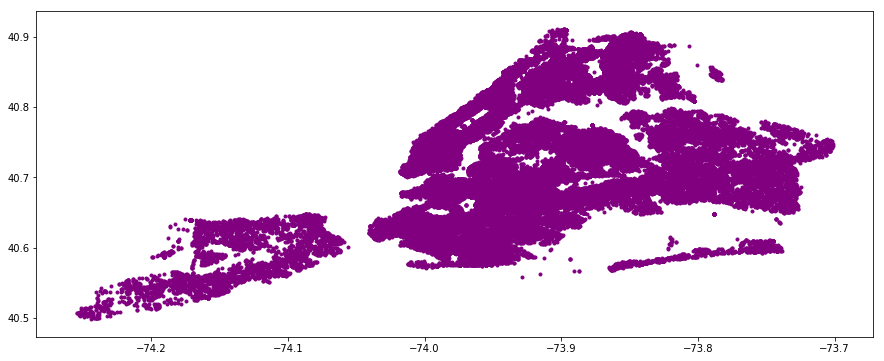

In [4]:
plt.scatter(orig_data['Longitude'], orig_data['Latitude'], marker='.', color="purple")

## Try this Example: 
Graph the number of noise complaints each hour in New York

In [108]:
orig_data['Complaint Type'].head(10)

0    Noise - Street/Sidewalk
1            Illegal Parking
2         Noise - Commercial
3            Noise - Vehicle
4                     Rodent
5         Noise - Commercial
6           Blocked Driveway
7         Noise - Commercial
8         Noise - Commercial
9         Noise - Commercial
Name: Complaint Type, dtype: object

/Users/minhgeneralassembly/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  This is separate from the ipykernel package so we can avoid doing imports until


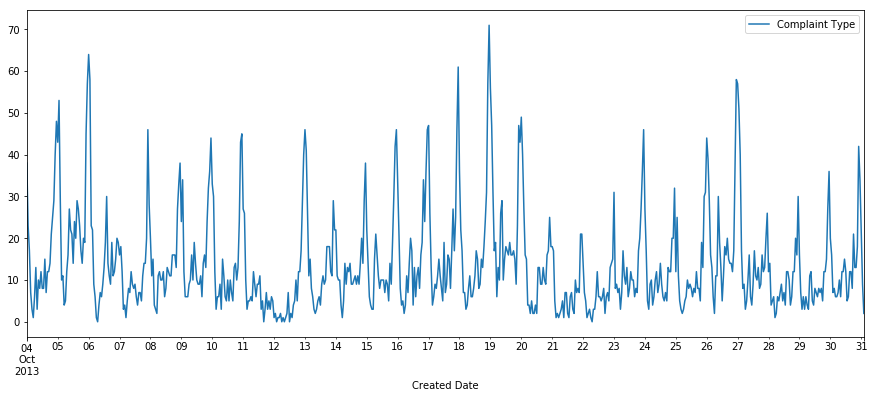

In [109]:
complaints = orig_data[['Created Date', 'Complaint Type']]
noise_complaints = complaints[complaints['Complaint Type'].str.contains('Noise')]
noise_complaints.set_index('Created Date').sort_index().resample('H', how=len).plot()

# Second: Using IPython
### Review Python Basics

Test your skills by answering the following questions:

#### Question 1.  Divide 10 by 20 and set the result to a variable named "A"

In [78]:
## Insert your code here and then uncomment | print A | when you are ready to test it. 

A = 10. / 20.
print(A)

0.5


In [15]:
#### If you did not get a float (decimals), alter your equation to get the desired result (0.5) 

#### Question 2. Create a function called division that will divide any two numbers and prints the result (with decimals). 
Call your function. Confirm that the results are as expected.

In [106]:
# add your function here
def division(num1,num2):
    if type(num1) != (int or float):
        print "First number needs to be a NUMBER!"
    if type(num2) != (int or float):
        print "Second number needs to be a NUMBER!"
    elif num2 != 0:
        print(float(num1)/num2)
    else:
        print "Can't divide by 0!"

In [107]:
division('a',1)

First number needs to be a NUMBER!


ValueError: could not convert string to float: a

#### Question 3. Using .split() split my string into separate words in a variable named words

In [23]:
my_string = "the cow jumped over the moon"
# put your code here it should return ['the', 'cow', 'jumped', 'over', 'the', 'moon']
words = my_string.split(' ')
print(words)

['the', 'cow', 'jumped', 'over', 'the', 'moon']


#### Question 4. How many words are in my_string?

In [36]:
len(words)

6

#### Question 5. Use a list comprehension to find the length of each word

result: [3, 3, 6, 4, 3, 4]

In [37]:
word_lens = []
for each in words:
    word_lens.append(len(each))
print word_lens

[3, 3, 6, 4, 3, 4]


#### Question 6. Put the words back together in a variable called sentence using .join()
result:
the cow jumped over the moon

In [56]:
sentence = ' '.join(words)
print sentence

the cow jumped over the moon


#### Bonus: Add a "||" between each word
result: 
the||cow||jumped||over||the||moon

In [57]:
sentence.replace(' ','||')

'the||cow||jumped||over||the||moon'